In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from pybaseball.lahman import *

In [0]:
bat = batting()
pit = pitching()
master = people()
money = salaries()
teams_df = teams()

In [0]:
money = money[(money['yearID'] >= 2010) & (money['yearID']<=2016)]
bat = bat[(bat['yearID'] >= 2010) & (bat['yearID']<=2016)]
pit = pit[(pit['yearID']>=2010) & (pit['yearID']<=2016)]
teams_df = teams_df[(teams_df['yearID']>=2010) & (teams_df['yearID']<= 2016)]

In [0]:
money = money.groupby(['yearID', 'teamID'],as_index=False).sum()

In [192]:
money.columns

Index(['yearID', 'teamID', 'salary'], dtype='object')

In [0]:
teams_df = teams_df.merge(money, how='left',left_on=['teamID','yearID'], right_on=['teamID','yearID'])

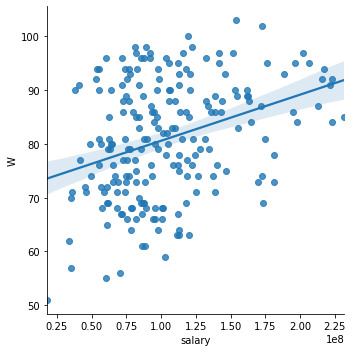

In [194]:
sns.lmplot(x='salary',y='W',data=teams_df)
plt.show()

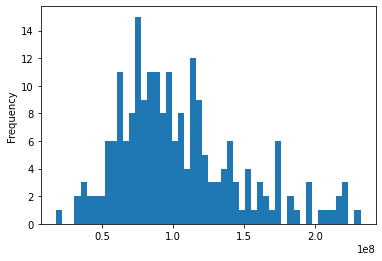

In [195]:
teams_df['salary'].plot(kind='hist',bins=50)

In [196]:
teams_df.corr()['salary'].sort_values(ascending=False)

salary        1.000000
attendance    0.723891
W             0.339423
SOA           0.338183
R             0.309617
H             0.288682
yearID        0.265271
HR            0.251363
FP            0.214070
AB            0.202926
SV            0.152186
HBP           0.143869
CG            0.142561
BPF           0.123598
SF            0.111496
2B            0.101056
SHO           0.095579
BB            0.087898
HRA           0.083978
Ghome         0.067924
PPF           0.065543
IPouts        0.057209
G            -0.026005
DP           -0.068852
3B           -0.092595
ER           -0.112510
ERA          -0.113157
RA           -0.132427
HA           -0.135850
SO           -0.168063
SB           -0.235238
E            -0.236616
BBA          -0.257212
Rank         -0.275568
CS           -0.337398
L            -0.340436
Name: salary, dtype: float64

In [0]:
teams_df['Runs Differential'] = teams_df['R']-teams_df['RA']

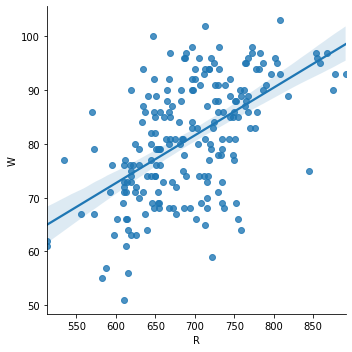

In [199]:
sns.lmplot(x='R',y='W',data=teams_df)
plt.show()

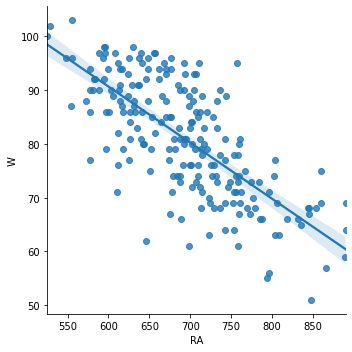

In [200]:
sns.lmplot(x='RA',y='W',data=teams_df)
plt.show()

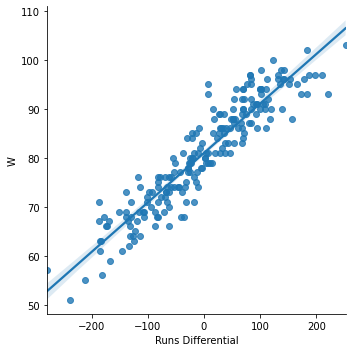

In [201]:
sns.lmplot(x='Runs Differential',y='W',data=teams_df)
plt.show()

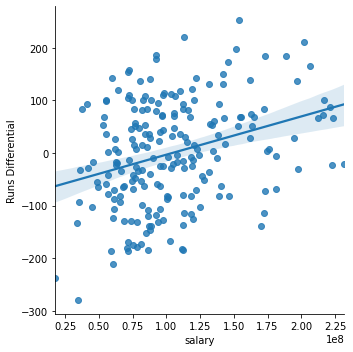

In [202]:
sns.lmplot(x='salary',y='Runs Differential',data=teams_df)
plt.show()

In [0]:
bat['Singles'] = bat['H']-bat['2B']-bat['3B']-bat['HR']

In [0]:
bat['TB'] = bat['H']+(bat['2B']*2)+(bat['3B']*3)+(bat['HR']*4)

In [0]:
bat['Runs Created'] = ((bat['H'] + bat['BB'])*bat['TB'])/(bat['AB']+bat['BB'])

In [0]:
bat['Runs Created'] = bat['Runs Created'].round(0)

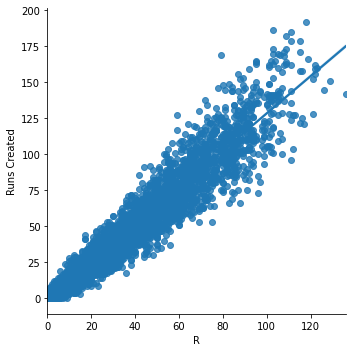

In [207]:
sns.lmplot(x='R',y='Runs Created',data=bat)
plt.show()

In [0]:
y = bat['R']
X = bat[['H','TB','BB']]

In [209]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [210]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 1.157e+05
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        17:17:27   Log-Likelihood:                -28258.
No. Observations:                9966   AIC:                         5.652e+04
Df Residuals:                    9962   BIC:                         5.655e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1306      0.049     -2.688      0.0

In [211]:
y = bat['R']
X = bat[['H','Singles','2B']]
lm = LinearRegression()
lm.fit(X,y)
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 1.043e+05
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        17:17:32   Log-Likelihood:                -28761.
No. Observations:                9966   AIC:                         5.753e+04
Df Residuals:                    9962   BIC:                         5.756e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0122      0.051     -0.238      0.8

In [212]:
y = bat['R']
X = bat[['H','Singles','2B','BB','HR']]
lm = LinearRegression()
lm.fit(X,y)
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 7.843e+04
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        17:17:35   Log-Likelihood:                -27665.
No. Observations:                9966   AIC:                         5.534e+04
Df Residuals:                    9960   BIC:                         5.539e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1249      0.046     -2.728      0.0

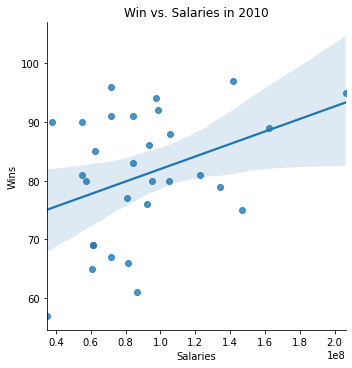

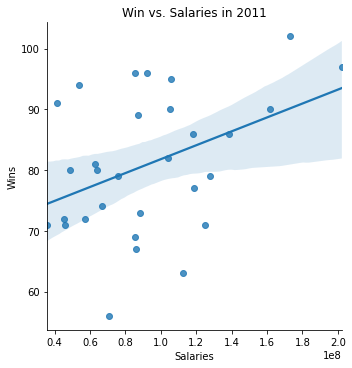

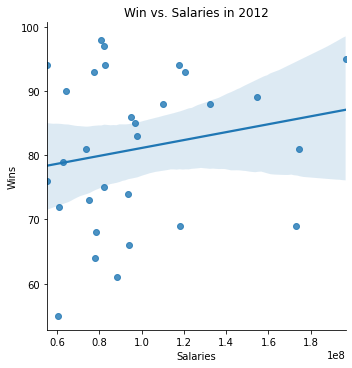

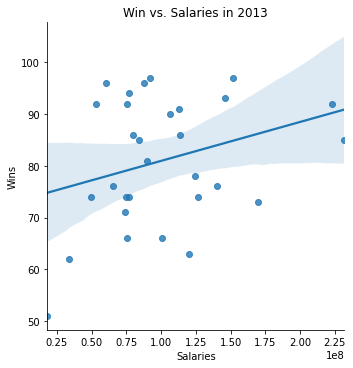

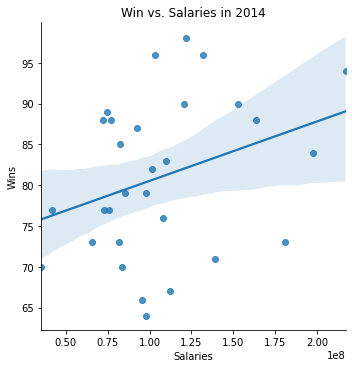

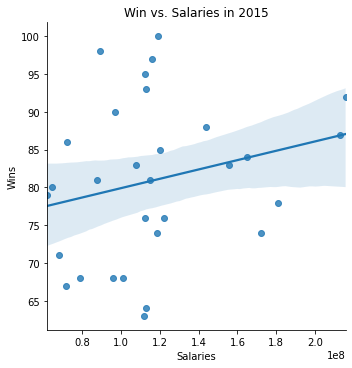

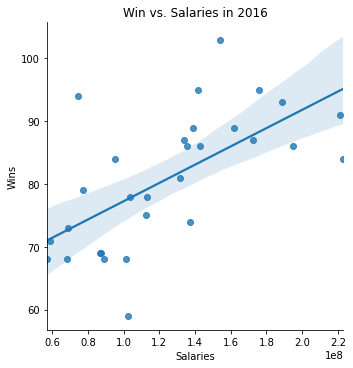

In [214]:
def plotYear(year):
  years = teams_df[teams_df['yearID'] == year]
  sns.lmplot(x='salary',y='W',data=years)
  plt.title('Win vs. Salaries in '+str(year))
  plt.xlabel('Salaries')
  plt.ylabel('Wins')

for year in range(2010,2017,1):
    plotYear(year)

plt.show()

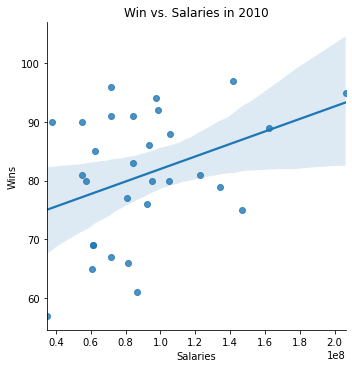

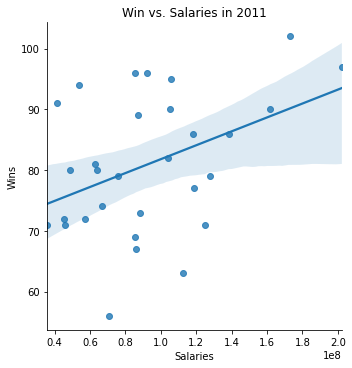

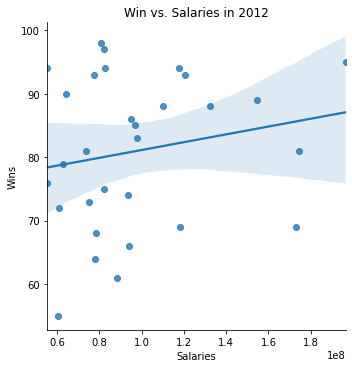

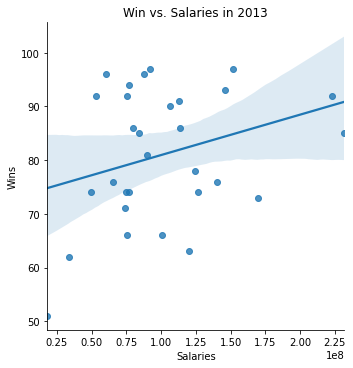

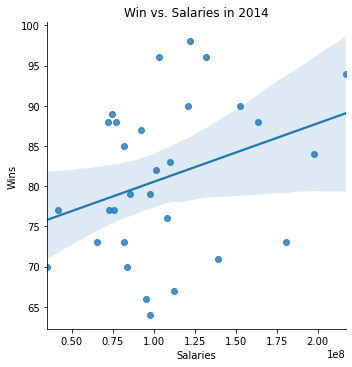

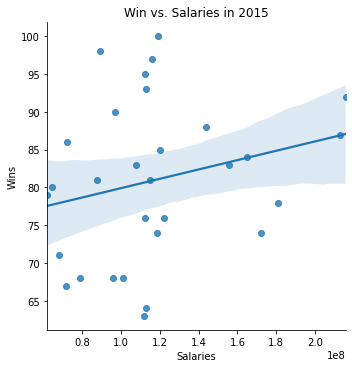

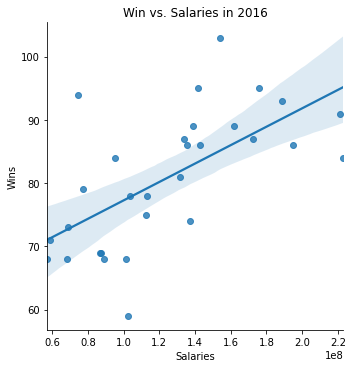

In [0]:
teams2 = teams()
teams2 = teams2[(teams2['yearID']>=2010) & (teams2['yearID']<=2019)]

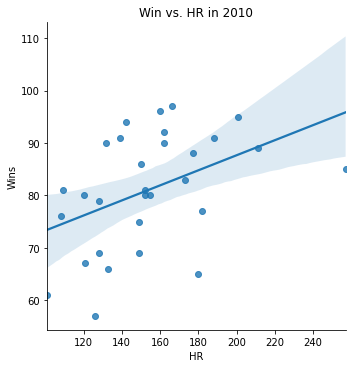

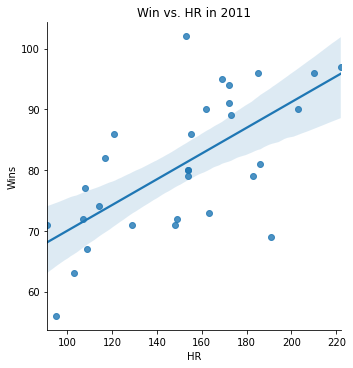

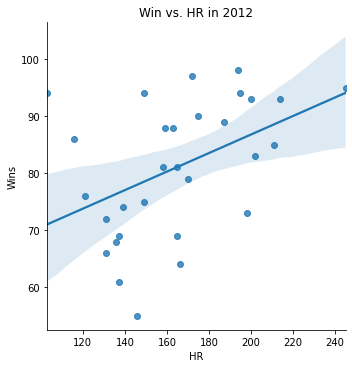

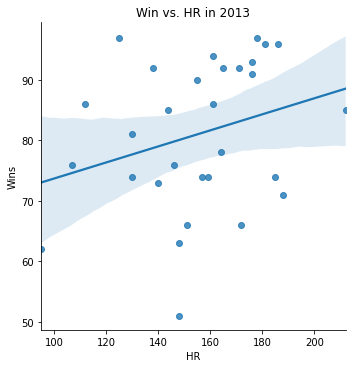

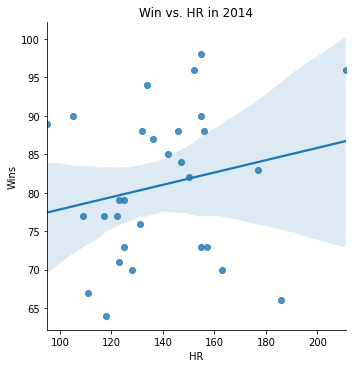

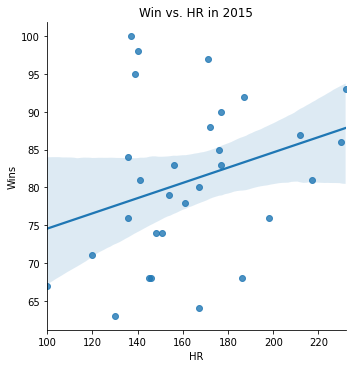

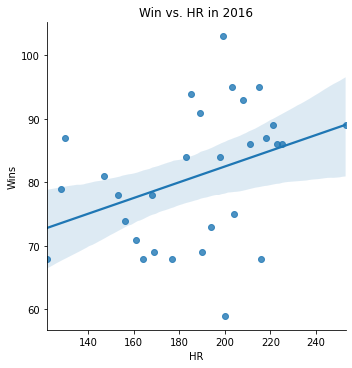

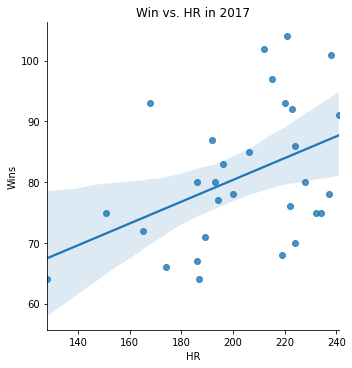

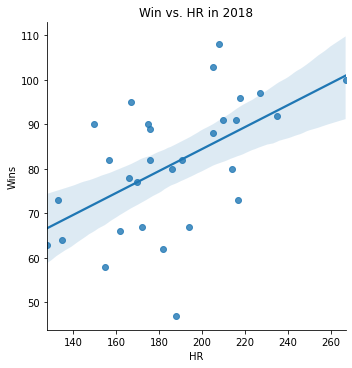

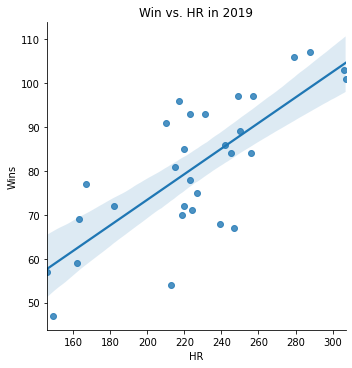

In [219]:
def plotYear(year):
  years = teams2[teams2['yearID'] == year]
  sns.lmplot(x='HR',y='W',data=years)
  plt.title('Win vs. HR in '+str(year))
  plt.xlabel('HR')
  plt.ylabel('Wins')

for year in range(2010,2020,1):
    plotYear(year)

plt.show()